In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd

In [3]:
data = pd.read_table('ex1data2.txt', sep=',')
data.head()

,size,#bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [167]:
X = data.iloc[:, 0:-1].values
y = np.array([data.values[:, -1]]).T

In [168]:
X = np.concatenate((np.ones((X.shape[0],1)), X), axis=1)

In [166]:
def NormalizeCoeff(X):
    return X.mean(), X.std()
def normalize(X):
    X_norm = np.ones_like(X)
    for i in range(1, X.shape[1]):
        mean = np.mean(X[:, i])
        std  = np.std(X[:, i])
        X_norm[:, i] = (X[:, i] - mean) / std
    return X_norm

In [169]:
X1_mean, X1_std = NormalizeCoeff(X[:, 1])
X2_mean, X2_std = NormalizeCoeff(X[:, 2]) 
X = normalize(X)

In [154]:
m = y.shape[0]

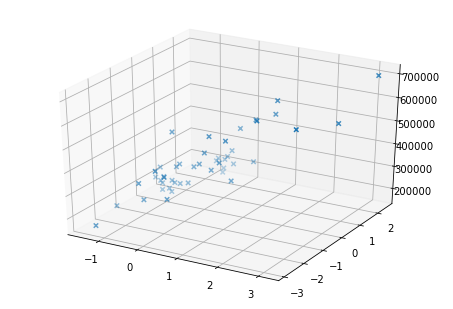

In [155]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,1], X[:, 2], y, marker='x')

In [156]:
def ComputeCost(X, y, theta):
    m = y.shape[0]
    J = (1 / (2 * m)) * np.sum((np.dot(X, theta) - y)**2, axis=0)
    return J

In [157]:
def GradientDescent(X, y, theta, alpha, itr):
    costs = []
    m = y.shape[0]
    theta_ = theta.copy()
    for i in range(itr):
        theta_ -= (alpha / m) * np.sum((np.dot(X, theta_) - y) * X, axis=0).reshape(theta.shape[0], theta.shape[1])
        costs.append(ComputeCost(X, y, theta_))
    return theta_, costs

In [158]:
theta_init = np.zeros((3, 1))
itr = 1500
alpha = 0.02
theta, costs = GradientDescent(X, y, theta_init, alpha, itr)

array([  2.04328005e+09])

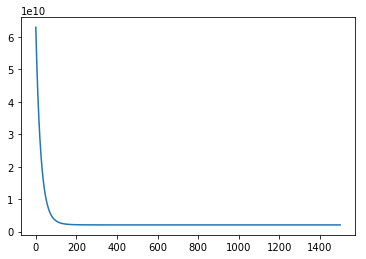

In [159]:
plt.plot(np.arange(itr), costs)
costs[-1]

In [160]:
# Gradient Descent
theta

array([[ 340412.65957444],
       [ 109447.69530358],
       [  -6578.2536881 ]])

In [161]:
# analytically
np.dot(np.linalg.pinv(X), y)

array([[ 340412.65957447],
       [ 109447.79646964],
       [  -6578.35485416]])

In [162]:
# error
ComputeCost(X, y, np.dot(np.linalg.pinv(X), y)) - costs[-1]

array([-0.0045023])

In [189]:
# predict
size = 1650
numBedroom = 3
theta[0,0] + ((size - X1_mean) / X1_std) * theta[1, 0] + ((numBedroom - X2_mean) / X2_std) * theta[2, 0]

293081.4865863985